In [1]:
import numpy as np, pandas as pd
import sklearn

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('International_Breweries.csv')


In [3]:
data.head()

,SALES_ID,SALES_REP,EMAILS,BRANDS,PLANT_COST,UNIT_PRICE,QUANTITY,COST,PROFIT,COUNTRIES,REGION,MONTHS,YEARS
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017


In [4]:
data.columns = [column.lower() for column in data.columns]
data.columns = [col.replace(' ', '') for col in data.columns]
data.head()

,sales_id,sales_rep,emails,brands,plant_cost,unit_price,quantity,cost,profit,countries,region,months,years
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017


In [5]:
df = data.copy()

In [6]:
df['country_type'] = [
    'Anglophone' 
    if count == 'Nigeria' or count == 'Ghana' else 'Francophone' 
    for count in df.countries
]
df.head()

,sales_id,sales_rep,emails,brands,plant_cost,unit_price,quantity,cost,profit,countries,region,months,years,country_type
0,10101,Jardine,jard@gmail.com,trophy,150,200,725,145000,36250,Ghana,Southeast,January,2019,Anglophone
1,10102,Gill,gillhell@uk.com,budweiser,250,500,815,407500,203750,Nigeria,west,February,2018,Anglophone
2,10103,Sorvino,sorvi2000@gmail.com,castle lite,180,450,937,421650,252990,Togo,southsouth,March,2018,Francophone
3,10104,Jones,jone.ai@yahoo.com,eagle lager,170,250,765,191250,61200,Benin,northwest,April,2018,Francophone
4,10105,Andrews,andy@gmail.com,hero,150,200,836,167200,41800,Senegal,northeast,May,2017,Francophone


<Figure size 1080x1800 with 0 Axes>

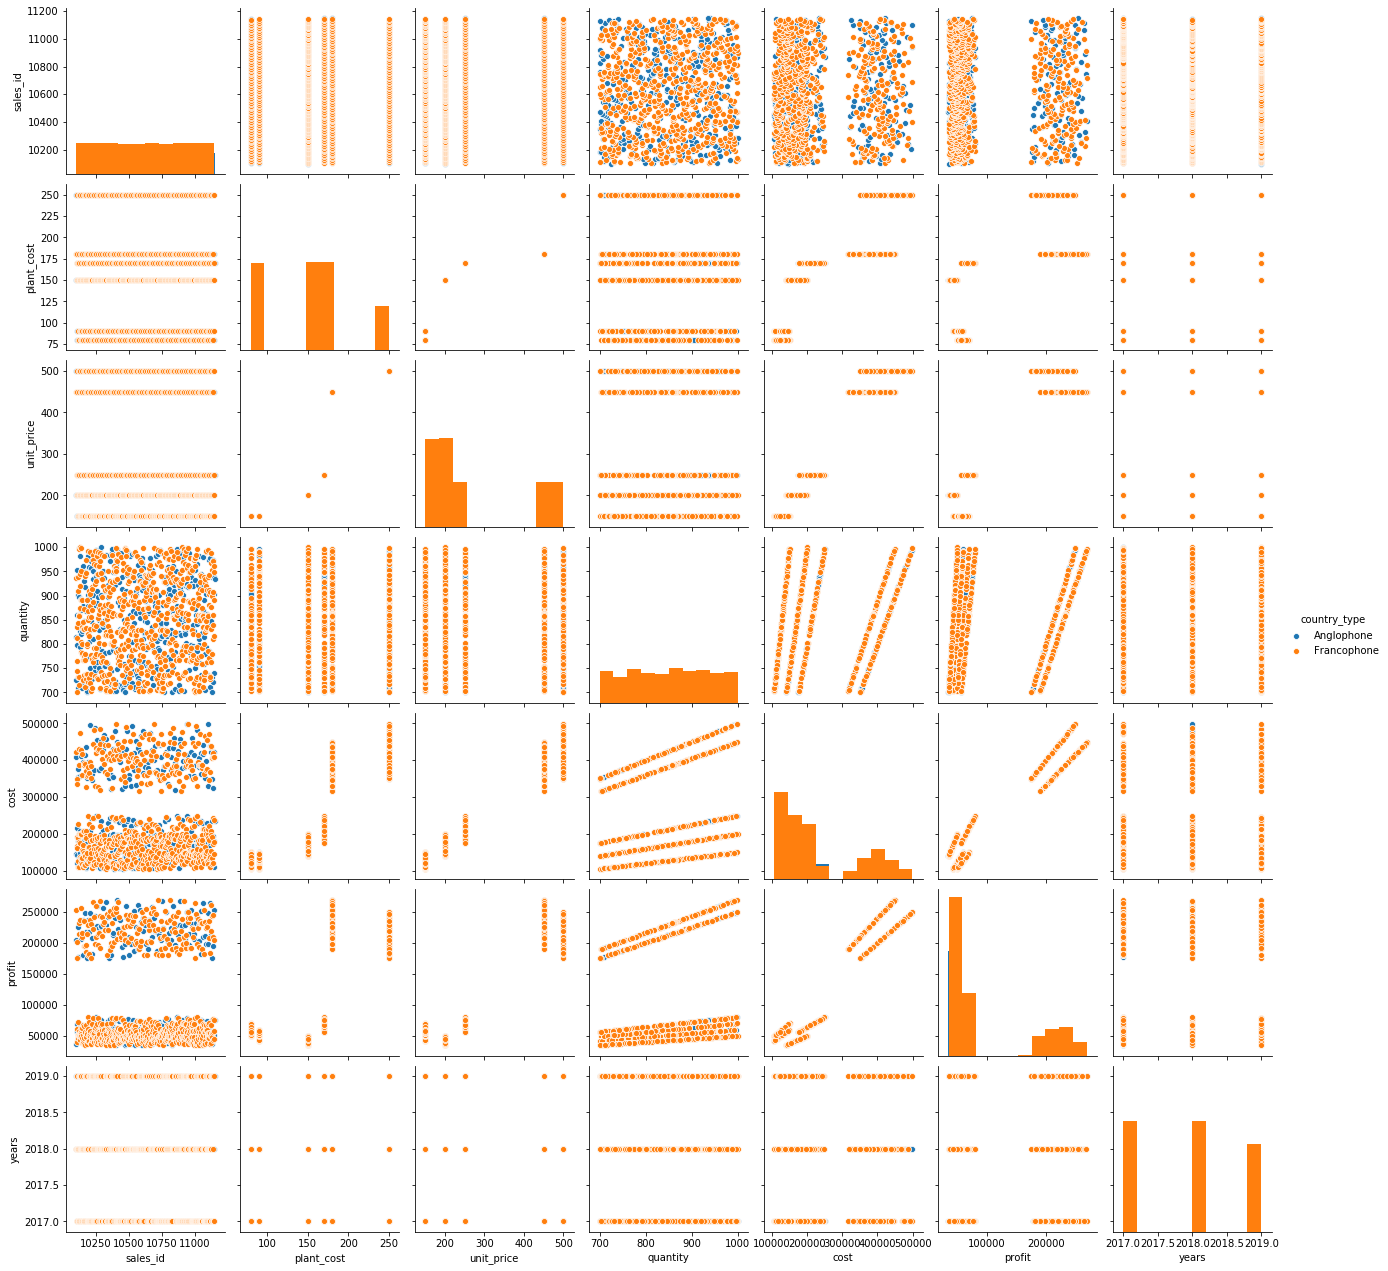

In [7]:

plt.figure(figsize= (15, 25))
sns.pairplot(data = df,
             hue= 'country_type',
            diag_kind = 'hist')



# SECTION A

## PROFIT ANALYSIS

PROFIT ANALYSIS
1. Within the space of the last three years, what was the profit worth of the breweries, inclusive of the anglophone and the francophone territories?
2. Compare the total profit between these two territories in order for the territory manager, Mr.Stone make strategic decision that will aid profit maximization in 2020.
3. Country that generated the highest profit in 2019
4. Help him find the year with the highest profit.
5. Which month in the three years were the least profit generated?
6. What was the minimum profit in the month of December 2018?
7. Compare the profit in percentage for each of the month in 2019 
8. Which particular brand generated the highest profit in Senegal?


1. Within the space of the last three years, what was the profit worth of the breweries, inclusive of the anglophone and the francophone territories?

In [8]:
profit_for_years = df.groupby('years').sum()[['profit']].reset_index()
#profit_for_years = profit_for_years[['profit']]
profit_for_years


,years,profit
0,2017,38503320
1,2018,37063850
2,2019,30020250


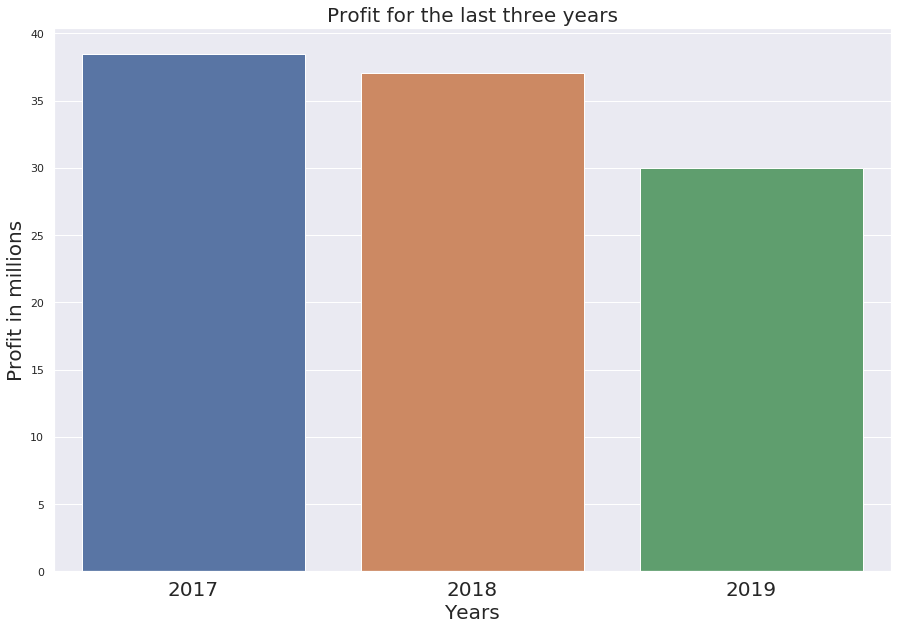

In [9]:
plt.figure(figsize=(15, 10))
sns.set(style = 'darkgrid')
col = sns.color_palette('Blues_d', len(profit_for_years))

chart = sns.barplot(x=profit_for_years.years,
                   y= profit_for_years.profit/1000000)

chart.set_xticklabels(chart.get_xticklabels(), fontsize= 20)
chart.set_ylabel('Profit in millions', fontsize = 20)
chart.set_xlabel('Years', fontsize= 20)
plt.title('Profit for the last three years',fontsize =20) 
plt.show()  


In [50]:


fig = go.Figure(data = [go.Bar(
    x= profit_for_years.years,
    y = profit_for_years.profit,
    text = profit_for_years.profit,
    textposition = 'auto',
)])

fig.update_layout(
    autosize= False,
    width = 500,
    height = 400,
    xaxis_title="Years",
    yaxis_title= "Profit",
    title_text = 'Profit worth of the breweries'

)

fig.show()



2. Compare the total profit between these two territories in order for the territory manager, Mr.Stone make strategic decision that will aid profit maximization in 2020.


In [11]:
data2 = df[['years', 'country_type', 'profit']]
data2 = data2.groupby(['years', 'country_type']).sum().reset_index()
data2b = data2.groupby(['country_type'])['profit'].sum().reset_index()
display(data2b)
display(data2)


,country_type,profit
0,Anglophone,42389260
1,Francophone,63198160


,years,country_type,profit
0,2017,Anglophone,15749550
1,2017,Francophone,22753770
2,2018,Anglophone,14690320
3,2018,Francophone,22373530
4,2019,Anglophone,11949390
5,2019,Francophone,18070860


In [12]:

fig = go.Figure(data = [go.Bar(x= data2b.country_type,
                              y= data2b.profit,
                              text = data2b.profit,
                              textposition = 'auto',
                              )])
fig.update_layout(width= 300,
                  xaxis_title="country_type",
                  yaxis_title= "profit",
                  title_text='Total profit between the two territories')
fig.show()


In [13]:
fig = px.bar(data_frame = data2, x='years', 
             y='profit', 
             color= 'country_type', 
             barmode= 'group', width = 400, height = 400)

fig.update_layout(width= 500,
                  xaxis_title="country_type",
                  yaxis_title= "profit",
                  title_text='Total profit between the two territories in years')

fig.show()


3. Country that generated the highest profit in 2019


In [14]:
data3 = df[df['years'] == 2019]

data3 = data3[['countries', 'profit']].groupby(
    'countries').sum().sort_values('profit', ascending = False).reset_index()
data3


,countries,profit
0,Ghana,7144070
1,Senegal,6687560
2,Togo,6109960
3,Benin,5273340
4,Nigeria,4805320


In [15]:

colors = ['lightslategray',] * 5
colors[0] = 'crimson'


fig = go.Figure(data= [go.Bar(x= data3.countries,
                             y= data3.profit,
                             text= data3.profit,
                             textposition = 'auto',
                             marker_color = colors)])

fig.update_layout(autosize= False,
                 width= 400,
                 height = 400,
                  xaxis_title="country_type",
                  yaxis_title= "profit",
                 title_text = 'Country that generated the highest profit in 2019')
                 
fig.show()




4. Help him find the year with the highest profit.


In [16]:
data4 = data2[['years', 'profit']].groupby(
    'years').sum().reset_index()

data4.head()


,years,profit
0,2017,38503320
1,2018,37063850
2,2019,30020250


In [17]:

colors = ['lightslategray',] * 5
colors[0] = 'crimson'


fig = go.Figure(data = [go.Bar(x= data4.years,
                              y= data4.profit,
                              text = data4.profit,
                              textposition = 'auto',
                              marker_color = colors)])
fig.update_layout(width= 300,
                  xaxis_title= 'years',
                  yaxis_title = 'profit',
                 title_text = 'The year with the highest profit')
fig.show()


5. Which month in the three years were the least profit generated?


In [18]:
data5 = df[['years', 'months', 'profit']]

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
data5['months'] = pd.Categorical(data5['months'], categories=months, ordered=True)
data5.sort_values(by = 'months')

data5chart = data5.groupby(
['months', 'years']).sum().reset_index()

data5chart1 = data5chart.groupby('months')['profit'].sum().reset_index()
data5chart1


,months,profit
0,January,8722990
1,February,9028450
2,March,9066130
3,April,8573830
4,May,8772250
5,June,8828440
6,July,8787010
7,August,8730940
8,September,8702660
9,October,8767100


<Figure size 2880x1080 with 0 Axes>

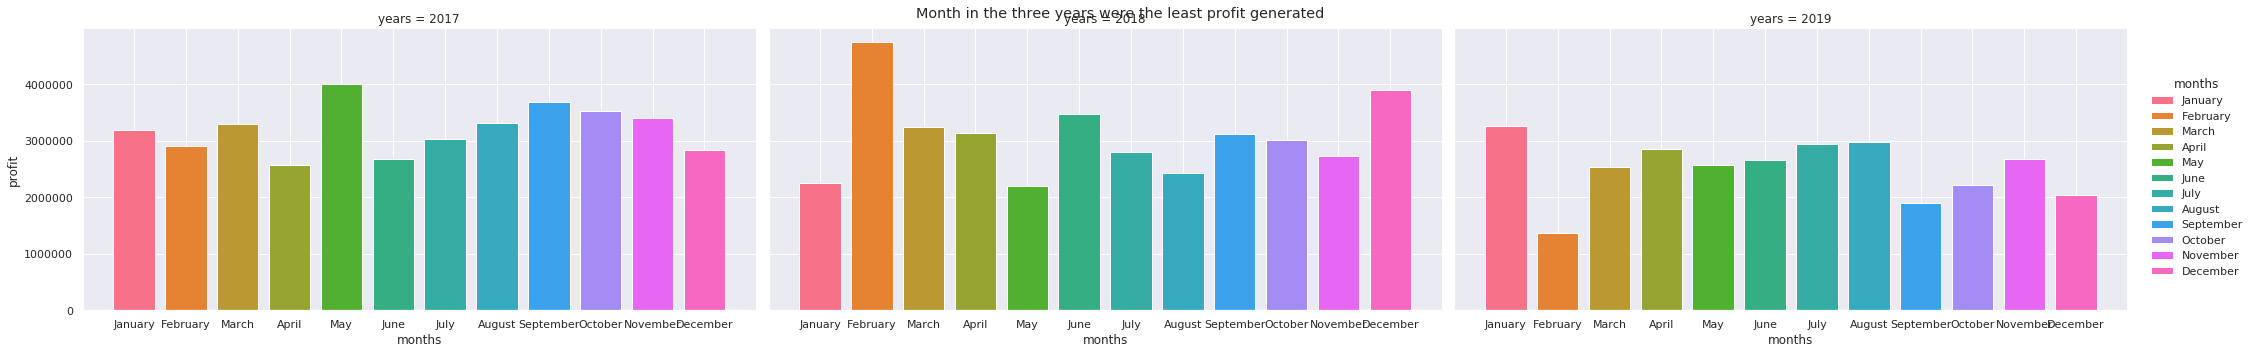

In [19]:

plt.figure(figsize= (40, 15))
chart = sns.FacetGrid(data = data5chart,
                      col= 'years', hue= 'months',
                     height= 5, aspect = 2)
chart.map(plt.bar,'months','profit')
chart.fig.suptitle('Month in the three years were the least profit generated')
chart.add_legend()



In [20]:

colors = ['lightslategray',] * 12
colors[3] = 'crimson'

fig = go.Figure(data = [go.Bar(x= data5chart1.months,
                              y= data5chart1.profit,
                              text = data5chart1.profit,
                              textposition = 'auto',
                              marker_color= colors)])
fig.update_layout(width= 500,
                  title_text='Month with least profit ')

fig.show()


6. What was the minimum profit in the month of December 2018?


In [21]:
data7 = df[df['years'] == 2018][df['months']== 'December']
data7 = data7[['years', 'months', 'profit']].groupby(['years', 'months']).sum().reset_index()

data7


,years,months,profit
0,2018,December,3902160



7. Compare the profit in percentage for each of the month in 2019 


In [22]:

data8 = df[df['years'] == 2019]
data8 = data8[['years', 'months', 'profit']]

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
data8['months'] = pd.Categorical(data8['months'], categories=months, ordered=True)
data8.sort_values(by = 'months')

data8chart = data8.groupby(['years', 'months']).sum().reset_index()
data8chart['percent (%)'] = [round(i/sum(data8chart.profit)*100, 2)
                         for i in data8chart.profit]

data8chart



,years,months,profit,percent (%)
0,2019,January,3263160,10.87
1,2019,February,1366880,4.55
2,2019,March,2530620,8.43
3,2019,April,2851470,9.50
4,2019,May,2573040,8.57
5,2019,June,2669080,8.89
6,2019,July,2945340,9.81
7,2019,August,2982800,9.94
8,2019,September,1892600,6.30
9,2019,October,2220870,7.40


In [23]:
fig = go.Figure(data = [go.Bar(x= data8chart.months,
                              y= data8chart['percent (%)'],
                              text = data8chart['percent (%)'],
                              textposition = 'auto',
                              )])
fig.update_layout( width = 400,
                  xaxis_title = 'months',
                  yaxis_title = 'profit percentage',
                  title_text='Profit in percentage for each of the month in 2019')

fig.show()


8. Which particular brand generated the highest profit in Senegal?

In [24]:
data9 = df[['brands','countries', 'profit']]
data9 = data9[data9['countries']== 'Senegal'].groupby(
['brands', 'countries',]).sum().reset_index()
data9


,brands,countries,profit
0,beta malt,Senegal,1793750
1,budweiser,Senegal,6480750
2,castle lite,Senegal,7012980
3,eagle lager,Senegal,2061680
4,grand malt,Senegal,1525680
5,hero,Senegal,1331600
6,trophy,Senegal,1278750


In [25]:

colors = ['lightslategray',] * 7
colors[2] = 'crimson'


fig = go.Figure(data = [go.Bar(x= data9.brands,
                              y= data9.profit,
                              text = data9.profit,
                              textposition = 'auto',
                              marker_color= colors)])
fig.update_layout(width= 300,
                  xaxis_title="Brands",
                  yaxis_title= "Quantity consumed",
                  title_text='The brand that generated the highest profit in Senegal')

fig.show()


# SECTION B

## BRAND ANALYSIS

BRAND ANALYSIS
1. Within the last two years, the brand manager wants to know the top three brands consumed in the francophone countries
2. Find out the top two choice of consumer brands in Ghana
3. Find out the details of beers consumed in the past three years in the most oil reach country in West Africa.
4. Favorites malt brand in Anglophone region between 2018 and 2019 
5. Which brands sold the highest in 2019 in Nigeria?
6. Favorites brand in South_South region in Nigeria
7. Bear consumption in Nigeria 
8. Level of consumption of Budweiser in the regions in Nigeria
9. Level of consumption of Budweiser in the regions in Nigeria in 2019 (Decision on Promo)


1. Within the last two years, the brand manager wants to know the top three brands consumed in 
the francophone countries

In [26]:
df1 = df[['years', 'brands', 'country_type', 'quantity']]
df2 = df1[df1['country_type']== 'Francophone'][df1.years!= 2017]
df2 = df2.groupby(['brands', 'country_type']
                 )['quantity'].sum().reset_index()
df2 = df2.sort_values('quantity', ascending= False).reset_index(drop= True)

df2.head(3)


,brands,country_type,quantity
0,trophy,Francophone,52899
1,hero,Francophone,50846
2,eagle lager,Francophone,50630


In [27]:

colors = ['lightslategray',] * 7
colors[1] = 'crimson'
colors[2] = 'crimson'
colors[0] = 'crimson'



fig = go.Figure(data = [go.Bar(x= df2.brands,
                              y= df2.quantity,
                              text = df2.quantity,
                              textposition = 'auto',
                              marker_color= colors)])
fig.update_layout(width= 300,
                  xaxis_title="Brands",
                  yaxis_title= "Quantity consumed",
                  title_text='Top 3 brand for the last 2 years')

fig.show()


2. Find out the top two choice of consumer brands in Ghana


In [28]:
df3 = df[['years', 'brands', 'countries', 'quantity']]
df3 = df3[df3['countries']== 'Ghana']
df3 = df3.groupby(['brands', 'countries']
                 )['quantity'].sum().reset_index()
df3 = df3.sort_values('quantity', ascending= False).reset_index(drop= True)


df3.head(2)


,brands,countries,quantity
0,eagle lager,Ghana,25829
1,castle lite,Ghana,25806


In [29]:

colors = ['lightslategray',] * 7
colors[1] = 'crimson'
colors[0] = 'crimson'



fig = go.Figure(data = [go.Bar(x= df3.brands,
                              y= df3.quantity,
                              text = df3.quantity,
                              textposition = 'auto',
                              marker_color= colors)])
fig.update_layout(width= 300,
                  xaxis_title="Brands",
                  yaxis_title= "Quantity consumed",
                  title_text='Top 2 brand in Ghana')

fig.show()


3. Find out the details of beers consumed in the past three years in the most oil reach country in 
West Africa.


In [30]:
dfbeer = pd.concat([df.groupby('brands').get_group(mon) for mon in df.brands if mon != 'beta malt' and mon != 'grand malt'])

df4 = dfbeer[['brands', 'countries', 'quantity']]
df4 = df4[df4['countries']== 'Nigeria']
df4 = df4.groupby(['brands', 'countries']
                 )['quantity'].sum().reset_index()
df4 = df4.sort_values('quantity', ascending= False).reset_index(drop= True)


df4


,brands,countries,quantity
0,budweiser,Nigeria,3922950
1,eagle lager,Nigeria,3880800
2,trophy,Nigeria,3861450
3,castle lite,Nigeria,3852150
4,hero,Nigeria,3845839


In [31]:


fig = go.Figure(data = [go.Bar(x= df4.brands,
                              y= df4.quantity,
                              text = df4.quantity,
                              textposition = 'auto',
                              )])
fig.update_layout(width= 300,
                  xaxis_title="Brands",
                  yaxis_title= "Quantity consumed",
                  title_text='Details of beers consumed in the past three years in the most oil reach country in West Africa')

fig.show()
print('Details of beers consumed in the past three years in the most oil reach country in West Africa.')


Details of beers consumed in the past three years in the most oil reach country in West Africa.



4. Favorites malt brand in Anglophone region between 2018 and 2019 

In [32]:

dfmalt = pd.concat([df.groupby('brands').get_group(mon) for mon in df.brands if mon == 'beta malt' or mon == 'grand malt'])

df5 = dfmalt[dfmalt['countries']== 'Nigeria'][df.country_type == 'Anglophone'][df.years != 2017]
df5 = df5.groupby(['brands', 'country_type']
                 )['quantity'].sum().reset_index()
df5 = df5.sort_values('quantity', ascending= False).reset_index(drop= True)
#df5 = df5[df5.brands== 'beta malt' or df5.brands == 'grand malt']#[df5.brands == 'grand malt']

df5


,brands,country_type,quantity
0,beta malt,Anglophone,2485618
1,grand malt,Anglophone,2323506


In [33]:

fig = go.Figure(data = [go.Bar(x= df5.brands,
                              y= df5.quantity,
                              text = df5.quantity,
                              textposition = 'auto',
                              )])
fig.update_layout(width= 300,
                  xaxis_title="Brands",
                  yaxis_title= "Quantity consumed",
                  title_text='Favorites malt brand in Anglophone region between 2018 and 2019')

fig.show()

print('Favorites malt brand in Anglophone region between 2018 and 2019')


Favorites malt brand in Anglophone region between 2018 and 2019


5. Which brands sold the highest in 2019 in Nigeria?


In [34]:
df5 = df[df['countries']== 'Nigeria'][df.years == 2019]
df5 = df5.groupby(['years','countries', 'brands'])['quantity'].sum().reset_index()
df5 = df5.sort_values('quantity', ascending= False).reset_index(drop= True)
df5.head(1)



,years,countries,brands,quantity
0,2019,Nigeria,hero,9622


In [35]:

colors = ['lightslategray',] * 7
colors[0] = 'crimson'

fig = go.Figure(data = [go.Bar(x= df5.brands,
                              y= df5.quantity,
                              text = df5.quantity,
                              textposition = 'auto',
                              marker_color = colors)])
fig.update_layout(width= 300,
                  xaxis_title="Brands",
                  yaxis_title= "Quantity consumed",
                  title_text='Top Brand consumed in Nigeria')

fig.show()


6. Favorites brand in South_South region in Nigeria


In [36]:
df6 = df[df['countries']== 'Nigeria'][df['region'] == 'southsouth']
df6 = df6.groupby(['region','countries', 'brands'])['quantity'].sum().reset_index()
df6 = df6.sort_values('quantity', ascending= False).reset_index(drop= True)
df6.head()



,region,countries,brands,quantity
0,southsouth,Nigeria,eagle lager,4551
1,southsouth,Nigeria,trophy,4468
2,southsouth,Nigeria,hero,4456
3,southsouth,Nigeria,budweiser,4328
4,southsouth,Nigeria,castle lite,4287


In [37]:

colors = ['lightslategray',] * 7
colors[0] = 'crimson'

fig = go.Figure(data = [go.Bar(x= df6.brands,
                              y= df6.quantity,
                              text = df6.quantity,
                              textposition = 'auto',
                              marker_color = colors)])
fig.update_layout(width= 300,
                  xaxis_title="Region",
                  yaxis_title= "Quantity consumed",
                  title_text='Favorites brand in South_South region in Nigeria')

fig.show()

print('Favorites brand in South_South region in Nigeria')


Favorites brand in South_South region in Nigeria


7. Bear consumption in Nigeria 


In [38]:
dfbeer = pd.concat([df.groupby('brands').get_group(mon) for mon in df.brands if mon != 'grand malt' and mon != 'beta malt'])

df7 = dfbeer[dfbeer['countries']== 'Nigeria']
df7 = df7.groupby(['brands','countries'])['quantity'].sum().reset_index()
df7 = df7.sort_values('quantity', ascending= False).reset_index(drop= True)
df7


,brands,countries,quantity
0,budweiser,Nigeria,3922950
1,eagle lager,Nigeria,3880800
2,trophy,Nigeria,3861450
3,castle lite,Nigeria,3852150
4,hero,Nigeria,3845839


In [39]:


fig = go.Figure(data = [go.Bar(x= df7.brands,
                              y= df7.quantity,
                              text = df7.quantity,
                              textposition = 'auto',
                              )])
fig.update_layout(width= 300,
                  xaxis_title="Brands",
                  yaxis_title= "Quantity consumed",
                  title_text='Bear consumption in Nigeria')

fig.show()


8. Level of consumption of Budweiser in the regions in Nigeria


In [40]:
df8 = df[df['countries']== 'Nigeria'][df.brands == 'budweiser']
df8 = df8.groupby(['brands','countries','region'])['quantity'].sum().reset_index()
df8 = df8.sort_values('quantity', ascending= False).reset_index(drop= True)

df8


,brands,countries,region,quantity
0,budweiser,Nigeria,west,4620
1,budweiser,Nigeria,northcentral,4498
2,budweiser,Nigeria,southsouth,4328
3,budweiser,Nigeria,northeast,4320
4,budweiser,Nigeria,northwest,4274
5,budweiser,Nigeria,Southeast,4113


In [41]:


fig = go.Figure(data = [go.Bar(x= df8.region,
                              y= df8.quantity,
                              text = df8.quantity,
                              textposition = 'auto',
                              )])
fig.update_layout(width= 300,
                  xaxis_title="Regions",
                  yaxis_title= "Quantity consumed",
                  title_text='Level of consumption of Budweiser in the regions in Nigeria')

fig.show()

print('Level of consumption of Budweiser in the regions in Nigeria')


Level of consumption of Budweiser in the regions in Nigeria


9. Level of consumption of Budweiser in the regions in Nigeria in 2019 (Decision on Promo)


In [42]:
df9 = df[df['countries']== 'Nigeria'][df.brands == 'budweiser'][df.years== 2019]
df9 = df9.groupby(['brands','countries','years','region'])['quantity'].sum().reset_index()
df9 = df9.sort_values('quantity', ascending= False).reset_index(drop= True)

df9


,brands,countries,years,region,quantity
0,budweiser,Nigeria,2019,Southeast,1821
1,budweiser,Nigeria,2019,northeast,990
2,budweiser,Nigeria,2019,northwest,948
3,budweiser,Nigeria,2019,west,884
4,budweiser,Nigeria,2019,southsouth,847


In [43]:

colors = ['lightslategray',] * 7
colors[0] = 'crimson'


fig = go.Figure(data = [go.Bar(x= df9.region,
                              y= df9.quantity,
                              text = df9.quantity,
                              textposition = 'auto',
                              marker_color = colors)])
fig.update_layout(width= 300,
                  xaxis_title="Region",
                  yaxis_title= "Quantity consumed",
                  title_text='Level of consumption of Budweiser in the regions in Nigeria in 2019 (Decision on Promo)')

fig.show()

print('Level of consumption of Budweiser in the regions in Nigeria in 2019 (Decision on Promo)')


Level of consumption of Budweiser in the regions in Nigeria in 2019 (Decision on Promo)


# SECTION C

## COUNTRIES ANALYSIS

COUNTRIES ANALYSIS
1. Country with the highest consumption of beer.
2. Highest sales personnel of Budweiser in Senegal
3. Country with the highest profit of the fourth quarter in 2019

1. Country with the highest consumption of beer.


In [44]:
tb1 = df[df.brands != 'beta malt'][df.brands != 'grand malt'] 
tb1 = tb1.groupby(['countries',])['quantity'].sum().reset_index()
tb1 = tb1.sort_values('quantity', ascending= False).reset_index(drop= True)

tb1
#

,countries,quantity
0,Senegal,129875
1,Nigeria,129260
2,Benin,127455
3,Ghana,127232
4,Togo,125548


In [45]:

colors = ['lightslategray',] * 7
colors[0] = 'crimson'


fig = go.Figure(data = [go.Bar(x= tb1.countries,
                              y= tb1.quantity,
                              text = tb1.quantity,
                              textposition = 'auto',
                              marker_color = colors)])
fig.update_layout(width= 300,
                  xaxis_title="Country",
                  yaxis_title= "Quantity consumed",
                  title_text='Country with the highest consumption of beer')

fig.show()


2. Highest sales personnel of Budweiser in Senegal


In [46]:
tb2 = df[df['countries']== 'Senegal'][df.brands == 'budweiser']
tb2 = tb2.groupby(['countries','brands','sales_rep'])['quantity'].sum().reset_index()
tb2 = tb2.sort_values('quantity', ascending= False).reset_index(drop= True)

tb2


,countries,brands,sales_rep,quantity
0,Senegal,budweiser,Jones,5917
1,Senegal,budweiser,Sorvino,4246
2,Senegal,budweiser,Andrews,3336
3,Senegal,budweiser,Kivell,2813
4,Senegal,budweiser,Jardine,2507
5,Senegal,budweiser,Parent,1842
6,Senegal,budweiser,Smith,1673
7,Senegal,budweiser,Gill,966
8,Senegal,budweiser,Howard,952
9,Senegal,budweiser,Morgan,942


In [47]:

colors = ['lightslategray',] * 11
colors[0] = 'crimson'


fig = go.Figure(data = [go.Bar(x= tb2.sales_rep,
                              y= tb2.quantity,
                              text = tb2.quantity,
                              textposition = 'auto',
                              marker_color = colors)])
fig.update_layout(width= 300,
                  xaxis_title="Sales representative",
                  yaxis_title= "Quantity Sold",
                  title_text='Highest sales personnel of Budweiser in Senegal')

fig.show()


3. Country with the highest profit of the fourth quarter in 2019

In [48]:

dfmonth = pd.concat([df.groupby('months').get_group(mon) for mon in df.months if mon == 'October' or mon == 'November' or mon == 'December'])
tb3 = dfmonth[dfmonth.years== 2019]
tb3 = tb3.groupby(['years','countries',])['profit'].sum().reset_index()
tb3 = tb3.sort_values('profit', ascending= False).reset_index(drop= True)

tb3

,years,countries,profit
0,2019,Ghana,177935010
1,2019,Togo,126007320
2,2019,Nigeria,120345360
3,2019,Benin,96494310
4,2019,Senegal,83455620


In [49]:

colors = ['lightslategray',] * 5
colors[0] = 'crimson'


fig = go.Figure(data = [go.Bar(x= tb3.countries,
                              y= tb3.profit,
                              text = tb3.profit,
                              textposition = 'auto',
                              marker_color = colors)])
fig.update_layout(width= 300,
                  xaxis_title="Country",
                  yaxis_title= "Profit",
                  title_text='Country with the highest profit in fourth quarter in 2019')

fig.show()
print('Country with the highest profit in fourth quarter in 2019')


Country with the highest profit in fourth quarter in 2019
